In [1]:
import numpy as np

In [2]:
capital = 100
day = 100
init = 100

In [3]:
def etf(val,mu=0.001,sigma=0.03,leverage=1,volatility=None):
    true_mu = np.random.normal(mu,0.01,1)
    if not volatility:
        volatility = np.random.normal(true_mu,sigma,1)
    return val*(1 + leverage*volatility), leverage*volatility

In [4]:
def simulation(day, capital):
    norm_etf = init
    leverage_etf = init
    current_norm_etf = 0
    current_leverage_etf = 0
    for i in range(day):
        norm_etf, volatility = etf(norm_etf)
        leverage_etf, lev_volatility = etf(leverage_etf,leverage=3,volatility=volatility)

        current_norm_etf = current_norm_etf + capital/norm_etf
        current_leverage_etf = current_leverage_etf + capital/leverage_etf

    return current_norm_etf*norm_etf, current_leverage_etf*leverage_etf

In [5]:
sim = np.vectorize(simulation)

In [6]:
params = np.full((100,2),(day,capital))
days, capitals = params[:,0], params[:,1]
results = sim(days,capitals)

In [7]:
days, capitals

(array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [8]:
results

(array([10346.94937423, 12905.89189386, 10245.2204849 , 11293.13601458,
         7405.66235983, 11140.13551789, 10854.86967378, 10787.26307373,
        10197.64794147, 11232.13525036, 13042.62165287,  8879.57895472,
         8314.14633994, 11885.70955885, 11536.45866825,  8338.05558801,
         8436.45925652, 12214.24572978, 10800.91084772, 14674.17217864,
        10935.82824009,  9940.34052291,  9489.4336921 , 13193.15048168,
         9057.80936088, 13723.02699393,  9234.23871394,  9486.72231179,
         8404.17544823,  9965.88749975, 13205.33609299, 11986.36439182,
        11985.13951011,  8864.63782076, 10458.10011125, 12088.54369004,
        12369.28217599, 14416.25867279, 11054.58259276, 12841.08882507,
        11725.07895172, 11345.70107374, 12150.63602036, 11430.77729646,
         9766.80417322, 15203.05407352,  8995.90678372, 10034.123271  ,
        10949.05862529,  7710.46330643,  8433.80359558, 10380.04794464,
        13528.62668634,  8057.01408673,  9128.93619123, 10460.97

In [9]:
np.mean(results[0]),np.mean(results[1])

(10625.02116254435, 11753.119837094813)

In [10]:
np.std(results[0]),np.std(results[1])

(1743.5651589126278, 6054.0301952057325)

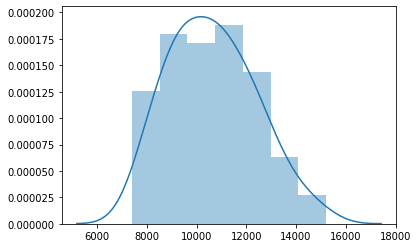

In [11]:
import seaborn as sns

sns.distplot(results[0])

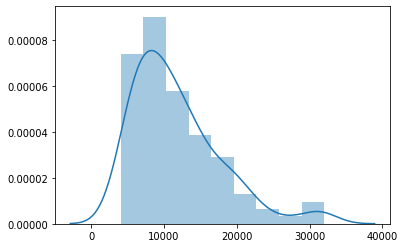

In [12]:
sns.distplot(results[1])

In [13]:
norm_etf = init
leverage_etf = init
current_norm_etf = 0
current_leverage_etf = 0
for i in range(day):
    norm_etf, volatility = etf(norm_etf)
    leverage_etf, lev_volatility = etf(leverage_etf,leverage=3,volatility=volatility)
    
    current_norm_etf = current_norm_etf + capital/norm_etf
    current_leverage_etf = current_leverage_etf + capital/leverage_etf

    
    print(f"Day {i}")
    print(norm_etf,volatility)
    print(leverage_etf,lev_volatility) 
    print(current_norm_etf)     
    print(current_leverage_etf)     

Day 0
[103.45207542] [0.03452075]
[110.35622627] [0.10356226]
[0.96663116]
[0.90615639]
Day 1
[103.23473027] [-0.00210093]
[109.66067548] [-0.00630278]
[1.93529742]
[1.81806031]
Day 2
[95.26567458] [-0.07719355]
[84.26538378] [-0.23158066]
[2.98499345]
[3.00478724]
Day 3
[97.54745587] [0.02395177]
[90.32029841] [0.0718553]
[4.01013551]
[4.11195808]
Day 4
[99.26219372] [0.0175785]
[95.08338424] [0.0527355]
[5.01756841]
[5.16366654]
Day 5
[98.88898986] [-0.00375978]
[94.01090685] [-0.01127934]
[6.02880334]
[6.2273729]
Day 6
[98.52227533] [-0.00370835]
[92.96503211] [-0.01112504]
[7.04380222]
[7.30304617]
Day 7
[94.27535268] [-0.04310622]
[80.94291935] [-0.12931865]
[8.10452485]
[8.53848469]
Day 8
[93.67338047] [-0.00638526]
[79.39239572] [-0.01915577]
[9.17206399]
[9.79805116]
Day 9
[90.9955296] [-0.02858711]
[72.58359919] [-0.08576132]
[10.27101908]
[11.17577287]
Day 10
[89.65662597] [-0.01471395]
[69.37962494] [-0.04414185]
[11.38638561]
[12.61711822]
Day 11
[88.4484389] [-0.01347571]


In [14]:
print(current_norm_etf*norm_etf)     
print(current_leverage_etf*leverage_etf)  

[10103.07710557]
[8569.58977639]
